# **Stroke Prediction - Data Wrangling**

## **1. Loading Libraries and Importing Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [9]:
df.head()
df.shape

(5110, 12)

The feature list and the target variable:

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## **2. Data Wrangling**

### 2.1. Checking for Missing Values

In [10]:
# checking the total number of missing values and the percentage of missing values
df.isnull().sum()
round(df['bmi'].isnull().sum()/len(df['bmi']),2)

0.04

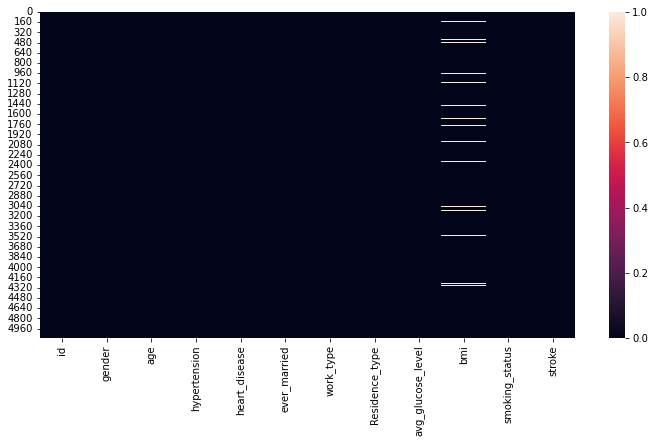

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())
plt.show()

BMI is the only column that has missing values (4% missing values). Since BMI mostly depends on age and gender, we can try sorting by age and gender to see if there is any pattern in missing values to impute missing values based on our findings. 

<AxesSubplot:>

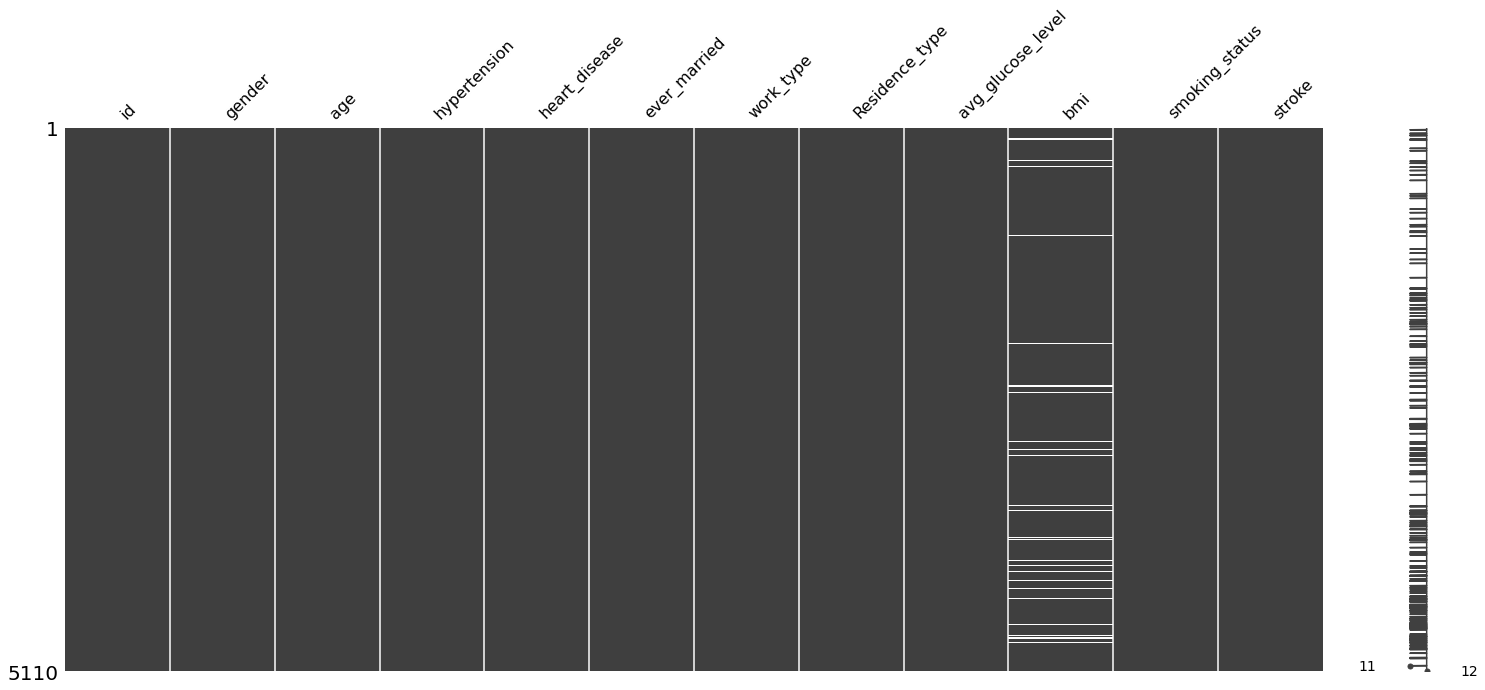

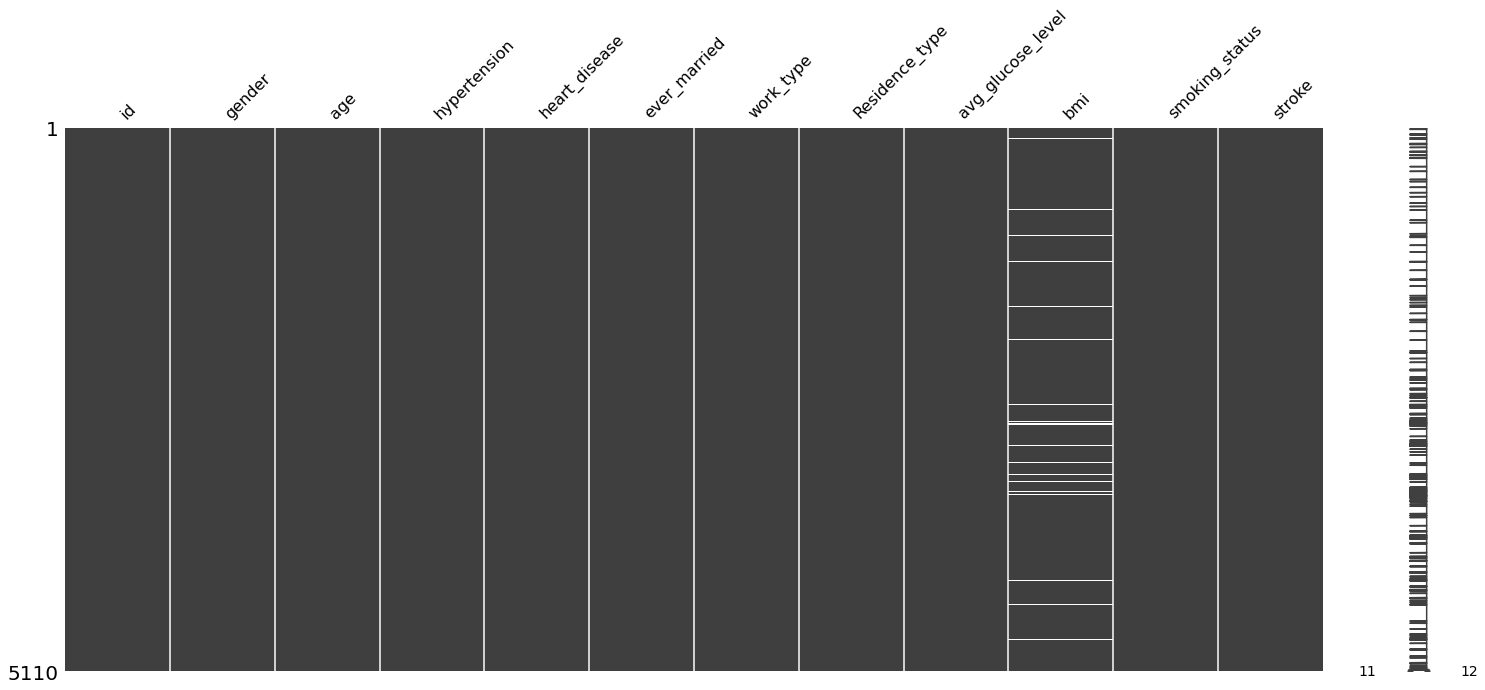

In [12]:
df_sorted_age = df.sort_values('age')
msno.matrix(df_sorted_age)

df_sorted_gender = df.sort_values('gender')
msno.matrix(df_sorted_gender)

<AxesSubplot:xlabel='bmi', ylabel='age'>

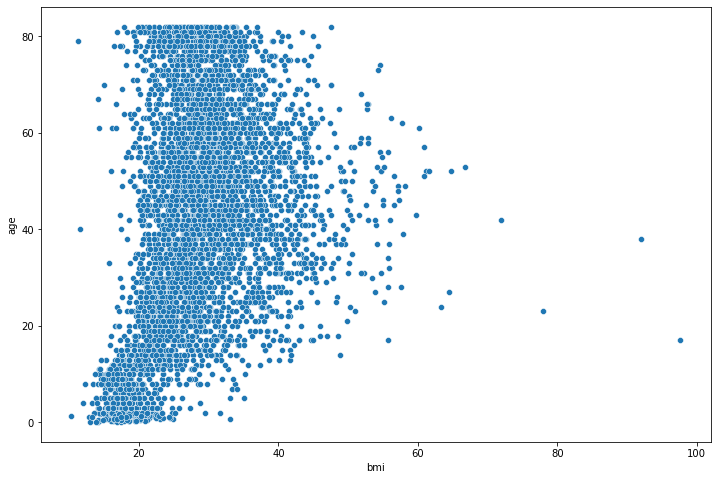

In [13]:
# visualizing BMI by age
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'bmi', y = 'age')

<AxesSubplot:xlabel='gender', ylabel='bmi'>

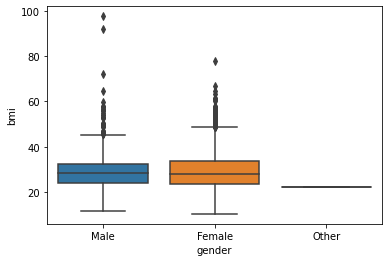

In [14]:
# visualizing BMI by gender
sns.boxplot(x=df['gender'],y=df['bmi'])

Gender and age don't give us a lot of information about the missing BMI values. We can try grouping the age into separate categories and then impute the BMI based on the median values for each category.

In [15]:
age_group = []

for age in df['age']:
    if age >= 0 and age < 2:
        age_group.append('Infant')
    elif age >= 2 and age < 5:
        age_group.append('Toddler')
    elif age >= 5 and age < 12:
        age_group.append('Child')
    elif age >= 12 and age < 20:
        age_group.append('Teen')
    elif age >= 20 and age < 60:
        age_group.append('Adult')
    elif age >= 60:
        age_group.append('Senior')

df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [20]:
df['age_group'].value_counts()

Adult      2768
Senior     1376
Teen        423
Child       288
Toddler     135
Infant      120
Name: age_group, dtype: int64

In [21]:
# visualizing median values for each age category with boxplots
fig = px.box(df, x="age_group", y="bmi",color="gender", 
             category_orders={'age_group': ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Senior']})
fig.show()

Now that we have the median values for each age group, we can impute the missing values.

In [22]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    
    if pd.isnull(bmi):
        if age_group == 'Infant':
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
        elif age_group == 'Toddler':
            if gender == 'Male':
                return 18.2
            else:
                return 18
        elif age_group == 'Child':
            if gender == 'Male':
                return 18.5
            else:
                return 18.5
        elif age_group == 'Teen':
            if gender == 'Male':
                return 23.75
            else:
                return 23.8
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Senior':
            if gender == 'Male':
                return 29.4
            else:
                return 29.2
    else:
        return bmi
            
df['bmi']=df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.2,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [23]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

### **2.2. Checking for Duplicated Values**

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.2,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [25]:
duplicates = df.duplicated('id', keep = False)

In [26]:
duplicated_ids = df[duplicates].sort_values('id')
df.duplicated().sum()

0

In [27]:
len(df['id'].unique())

5110

It doesn't look like we have duplicated values. All IDs appear to be unique.

### 2.3. Checking for Data Types

In [28]:
df.shape

(5110, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


Data Types seem to be correct.

In [30]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.876389,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.720968,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [31]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [32]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

In [38]:
for i in df.columns:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in id============
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
------------------------
============Values in gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------
============Values in age============
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
------------------------
============Values in hypertension============
0    4612
1     498
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------
============Values

In [39]:
df.drop(df[df['gender'] >= 'Other'].index, inplace = True)

In [40]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### 2.4 Checking for Outliers

<AxesSubplot:xlabel='stroke'>

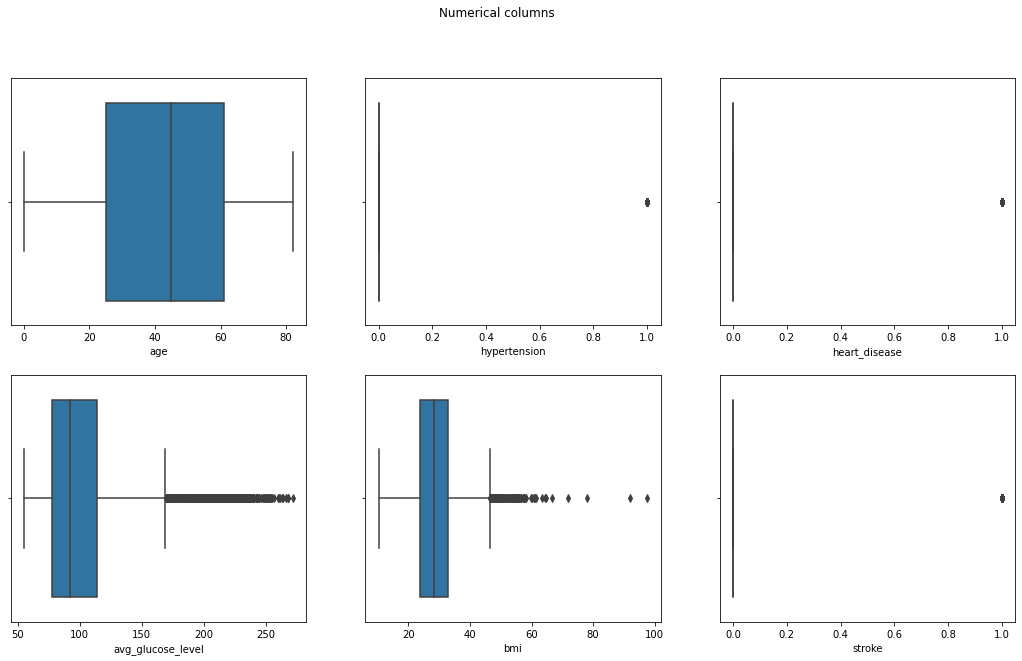

In [41]:
# visualizing boxplots of all numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Numerical columns')

sns.boxplot(ax=axes[0, 0], data=df, x='age')
sns.boxplot(ax=axes[0, 1], data=df, x='hypertension')
sns.boxplot(ax=axes[0, 2], data=df, x='heart_disease')
sns.boxplot(ax=axes[1, 0], data=df, x='avg_glucose_level')
sns.boxplot(ax=axes[1, 1], data=df, x='bmi')
sns.boxplot(ax=axes[1, 2], data=df, x='stroke')

In [42]:
df['bmi'].describe()

count    5109.000000
mean       28.877657
std         7.721192
min        10.300000
25%        23.700000
50%        28.300000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

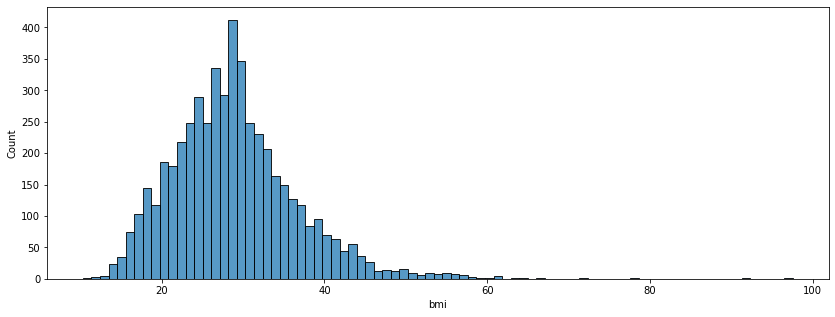

In [43]:
plt.figure(figsize = (14,5))
sns.histplot(x=df['bmi'])
plt.show()

In [44]:
# visualizing outliers in BMI column
fig = px.box(data_frame = df,
            x = "bmi",
            width = 800,
            height = 300)
fig.show()

In [45]:
#visualizing outliers in 'avg_glucose_level' column
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.show()

In [46]:
# function to find outliers
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

In [47]:
# checking for outliers in BMI column
outliers = find_outliers_IQR(df['bmi'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))

outliers

number of outliers: 123
max outlier value: 97.6
min outlier value: 46.5


21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4906    54.1
4952    56.6
5009    49.5
5057    47.6
5103    46.9
Name: bmi, Length: 123, dtype: float64

In [48]:
# checking how many of the BMI outliers had a stroke
bmi_outliers = df[df['bmi'] > 46.5]
bmi_outliers['stroke'].value_counts()

0    118
1      3
Name: stroke, dtype: int64

In [49]:
df['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [50]:
# checking for outliers in Average Glucose Level column
outliers2 = find_outliers_IQR(df['avg_glucose_level'])
print('number of outliers: '+ str(len(outliers2)))
print('max outlier value: ' + str(outliers2.max()))
print('min outlier value: ' + str(outliers2.min()))

outliers2

number of outliers: 627
max outlier value: 271.74
min outlier value: 169.43


0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64

In [51]:
# checking how many of the Average Glucose Level outliers had a stroke
avg_glucose_outliers = df[df['avg_glucose_level'] > 169.43]
avg_glucose_outliers['stroke'].value_counts()

0    542
1     84
Name: stroke, dtype: int64

In [52]:
# checking for outliers in Age column
outliers3 = find_outliers_IQR(df['age'])
print('number of outliers: '+ str(len(outliers3)))
print('max outlier value: ' + str(outliers3.max()))
print('min outlier value: ' + str(outliers3.min()))

outliers3

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: age, dtype: float64)

Age column does not have outliers. BMI and average glucose level columns have outliers. There are 84 outliers in average glucose level column who had a stroke, which is a lot of data. Removing them will lead to loss of data. BMI has only 3 outliers who had a stroke, so removing these won't affect data as much. We can remove the BMI outliers and check if it makes BMI less skewed.

In [53]:
print("The shape before removing the BMI outliers : ", df.shape)
df.drop(df[df['bmi'] > 46.5].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5109, 13)
The shape after removing the BMI outliers :  (4988, 13)


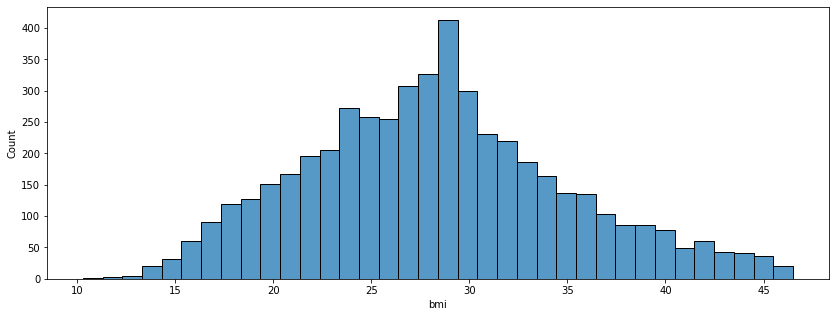

In [54]:
plt.figure(figsize = (14,5))
sns.histplot(x=df['bmi'])
plt.show()

**Data Wrangling Summary:**
    
- Loaded libraries and dataset
- Missing Values:
    - BMI had 207 missing values (4% of the data)
    - A new column (age group) was created and BMI values were imputed based on the median for each age category
- Duplicates:
    - There were no duplicates found. All IDs are unique.
- Data Types:
    - The gender column had 1 "Other" gender who did not have a stroke, so we removed that row. 
- Outliers:
    - BMI and average glucose level are the 2 columns that had outliers. BMI had 3 outliers who had a stroke compared to 84 outliers in 'avg_glucose_level' column who had a stroke, so we removed the BMI outliers to avoid losing too much data. 